In [1]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import matplotlib.pyplot as plt
import numpy as np

In [2]:
factory = PokemonFactory("pokemon.json")

In [3]:
def barGraphGroupedPercent(data, miny, maxY, groupLabels, barLabels, barColors, xLabel, yLabel, title, times):
    fig, ax = plt.subplots()
    bar_width = 0.175
    bar_positions = np.arange(len(data))

    for pokemonFromList, (label, color) in enumerate(zip(barLabels, barColors)):
        success_data = [sublist[pokemonFromList] * 100 / times if pokemonFromList < len(sublist) else 0 for sublist in data]
        ax.bar(
            bar_positions + pokemonFromList * bar_width,
            success_data,
            width=bar_width,
            label=label,
            color=color
        )
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(title)
    ax.set_xticks([pos + bar_width * 1.5 for pos in bar_positions])
    ax.set_xticklabels(groupLabels)
    handles = []
    for c in colors: handles.append(plt.Rectangle((0,0),1,1, color=c))
    ax.legend(handles, barLabels)

    plt.ylim(miny, maxY)
    plt.show()

In [4]:
#Vamos a recolectar la informacion de tirar cada pokebola 10000 veces para luego graficar el promedio de captura.
#Esta informacion la estamos guardando en arrays donde vamos a guardar a jolteon, caterpie, snorlax, onix, mewtwo en ese orden para cada pokebola.

#Ej 1.a

pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

successPokeBall = [0, 0, 0, 0, 0]
successUltraBall = [0, 0, 0, 0, 0]
successFastBall = [0, 0, 0, 0, 0]
successHeavyBall = [0, 0, 0, 0, 0]

jolteon = factory.create("jolteon", 100, StatusEffect.NONE, 1)
caterpie = factory.create("caterpie", 100, StatusEffect.NONE, 1)
snorlax = factory.create("snorlax", 100, StatusEffect.NONE, 1)
onix = factory.create("onix", 100, StatusEffect.NONE, 1)
mewtwo = factory.create("mewtwo", 100, StatusEffect.NONE, 1)

#Tiramos 10000 veces
timesThrown = 10000
for _ in range(timesThrown):
    for index, pokemon in enumerate([jolteon, caterpie, snorlax, onix, mewtwo]):
        if attempt_catch(pokemon, "pokeball")[0]:
            successPokeBall[index]+=1
        if attempt_catch(pokemon, "ultraball")[0]:
            successUltraBall[index]+=1
        if attempt_catch(pokemon, "fastball")[0]:
            successFastBall[index]+=1
        if attempt_catch(pokemon, "heavyball")[0]:
            successHeavyBall[index]+=1

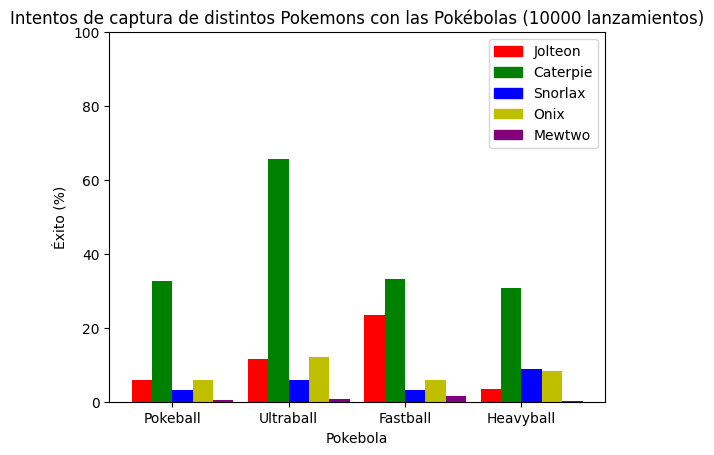

In [5]:
data = [successPokeBall, successUltraBall, successFastBall, successHeavyBall]
groupLabels = ["Pokeball", "Ultraball", "Fastball", "Heavyball"]
barLabels = ["Jolteon", "Caterpie", "Snorlax", "Onix", "Mewtwo"]
xLabel = "Pokebola"
yLabel = "Éxito (%)"
title = "Intentos de captura de distintos Pokemons con las Pokébolas (10000 lanzamientos)"
colors = ['r', 'g', 'b', 'y', 'purple']

#Hacemos un grafico de barras agrupado por pokebola mostrando la efectividad para cada pokemon
barGraphGroupedPercent(data, 0, 100, groupLabels, barLabels, colors, xLabel, yLabel, title, timesThrown)


En este gráfico se pueden observar las probabilidades de captura de los distintos pokemones dependiendo de la pokebola. Una pokebola no es mejor que la otra para todos los pokemones. Por ejemplo, la ultraball tiene una probabilidad de captura mucho mas alta que la pokeball cuando hablamos del caterpie. Pero para el jolteon la probabilidad de caputa es mayor pero no tanto. Y con la fastball podemos ver que la probabilidad de captura del jolteon es mas que el triple que la pokeball mientras que la probabilidad de captura del caterpie es la misma.

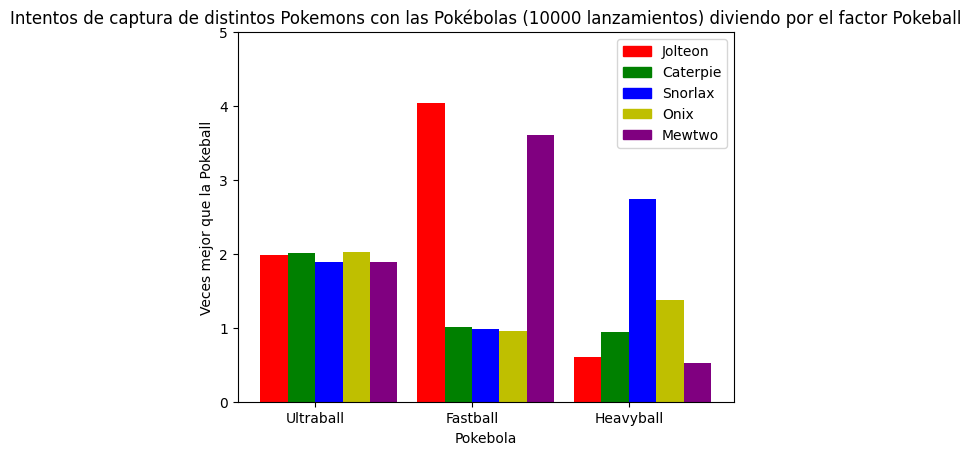

In [6]:
#Ej 1.b

# Para calcular si depende de propiedades del pokemon vamos a sacar de la cuenta el factor pokebola clasica. Haciendo esto podemos analizar que tanto mejor a una pokebola clasica es cada pokeball para cada pokemon.

# diviendo a todos los valores por el catchrate de usar la pokebola en ese pokemon.
for i in range(len(data[0])):
    divisor = data[0][i]
    for sublist in data[1:]:
        sublist[i] /= divisor

data.pop(0) #Elimino del array la Pokeball
groupLabels = ["Ultraball", "Fastball", "Heavyball"]
yLabel = "Veces mejor que la Pokeball"
title = "Intentos de captura de distintos Pokemons con las Pokébolas (10000 lanzamientos) diviendo por el factor Pokeball"
barGraphGroupedPercent(data, 0, 5, groupLabels, barLabels, colors, xLabel, yLabel, title, 100) #Times = 100 ya que ya se trata de un porcentaje y estamos graficando "Veces mejor"


En este gráfico se comparó la efectividad de cada pokebola con los distintos pokemones tomando como base la pokeball. Es decir, el grafico muestra cuanto más eficiente es cada pokebola intentando capturar los pokemones comparado con la pokeball, la cual es la pokebola básica.
Lo que más destaca del gráfico es que el jolteon y mewtwo son mucho más faciles de capturar usando una fastball. Asimismo, con la ultraball todos los pokemones tienen el doble de probabilidades de ser capturados en comparación con el uso de la pokeball básica. Para la heavyball se puede observar que el snorlax tiene el triple de probabilidades de ser capturado y el onix es también más facil de capturar, pero los otros pokemones suelen tener menos probabilidades de ser capturados comparando con la pokeball.

In [7]:
#¿Las condiciones de salud tienen algun efecto sobre la efectividad
# de la captura? Si es ası, ¿Cual es mas o menos efectiva?

#Ej 2a

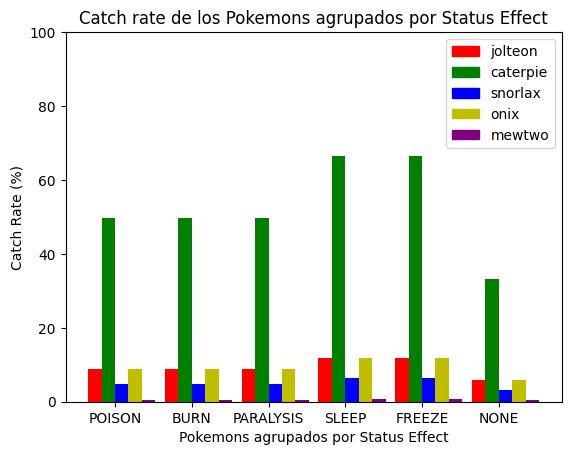

In [8]:
#Agrupo por status effect. cada barra muestra el porcentaje de captura para cada pokemon dado ese efecto.
status = []
statusNames = []
for i, effect in enumerate(StatusEffect):
    statusVals = []
    statusNames.append(effect.name)
    for p in ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"] :
        pokemon = factory.create(p, 100, effect, 1)
        statusVals.append(attempt_catch(pokemon, 'pokeball')[1]*100)
    status.append(statusVals)
barGraphGroupedPercent(status, 0, 100, statusNames, ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"], colors, 'Pokemons agrupados por Status Effect', 'Catch Rate (%)', 'Catch rate de los Pokemons agrupados por Status Effect', 100)


Este gráfico refleja el catch rate que tiene cada pokemon usando distintos status effects o condiciones de salud. En términos generales, el catch rate suele aumentar cuando el status effect es SLEEP o FREEZE. Si no tiene ninguno, el catch rate tiende a ser menor. Por otro lado, podemos observar que los status effect suelen afectar a los pokemones por igual, es decir, si aumenta cierto porcentaje para uno va a aumentar ese porcentaje para todos.

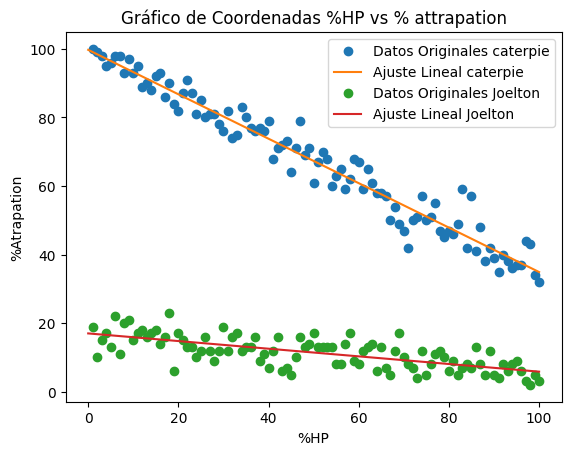

In [9]:
#Ejercicio 2.b
# la idea va a ser la siguiente: 
# Vamos a tomar a un pokemon, y por cada %HP vamos a tirar 100 intentos de captura de la pokebola
# com eso vamos a sacar la probabilidad de captura para cada HP. Con eso vamos a imprimir todos esos puntos en un grafico donde 

#x es la coordenada que va de 0 a 100 HP
#y es la coordenada que va de 0% a 100%

pokebol = "pokeball"
caterpiePoints = []
joeltonPoints = []

for hp_percentage in range(1, 101):
    caterpie = factory.create("caterpie", 100, StatusEffect.NONE, hp_percentage*0.01)
    joelton = factory.create("jolteon", 100, StatusEffect.NONE, hp_percentage*0.01)
    catchRateCaterpie = 0
    catchRateJoelton = 0
    for i in range(0, 100):
        catchRateCaterpie += attempt_catch(caterpie, pokebol)[0]
        catchRateJoelton += attempt_catch(joelton, pokebol)[0]
    caterpiePoints.append(catchRateCaterpie)
    joeltonPoints.append(catchRateJoelton)


xCaterpie = np.array(list(range(1, 101)))
yCaterpie = np.array(caterpiePoints)

coefficientsCaterpie = np.polyfit(xCaterpie, yCaterpie, 1)
polyCaterpie = np.poly1d(coefficientsCaterpie)

x_fit_caterpie = np.linspace(0, 100, 100)
y_fit_caterpie = polyCaterpie(x_fit_caterpie)

xJoelton = np.array(list(range(1, 101)))
yJoelton = np.array(joeltonPoints)


coefficientsJoelton = np.polyfit(xJoelton, yJoelton, 1)
polyJoelton = np.poly1d(coefficientsJoelton)

x_fit_joelton = np.linspace(0, 100, 100)
y_fit_joelton = polyJoelton(x_fit_joelton)



plt.plot(xCaterpie, yCaterpie, 'o', label='Datos Originales caterpie')
plt.plot(x_fit_caterpie, y_fit_caterpie, '-', label='Ajuste Lineal caterpie')

plt.plot(xJoelton, yJoelton, 'o', label='Datos Originales Joelton')
plt.plot(x_fit_joelton, y_fit_joelton, '-', label='Ajuste Lineal Joelton')


plt.title('Gráfico de Coordenadas %HP vs % attrapation')
plt.xlabel('%HP')
plt.ylabel('%Atrapation')
plt.legend()
plt.show()

Aca podemos ver las probabilidades de atrape segun el nivel de HP.
Se puede ver que los puntos generan una funcion lineal decreciente. Es decir, a medida de que sube el HP, baja la probabilidad de captura 

En caterpie es muy evidente, mientras que en joelton de por si la probabilidad de captura es baja, y a medida de que sube el HP se convierte casi en imposible de capturar.


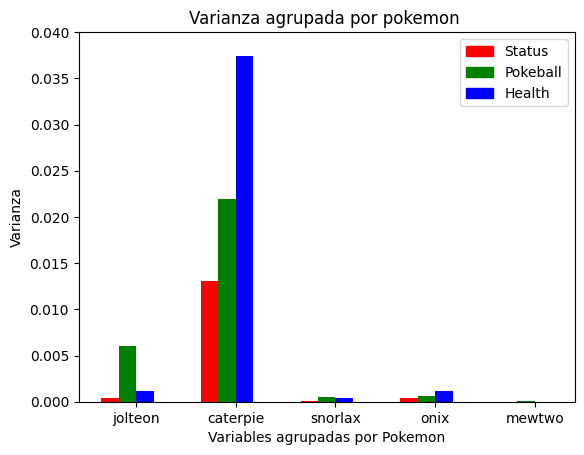

In [10]:
#Ejercicio 2.c

#Vamos a variar el efecto de estado, vida y pokebola para ver cual es el parametro que tiene mayor varianza.

#El catch rate ya lo tenemos, es el segundo valor del llamado a funcion. 
#Hay que variar por ejemplo, la vida de 0 a 100 e ir viendo el valor del catch rate y sacar la varianza.
#Tambien variar la pokebola, es decir probar una de las 4 que hay, anotar los 4 catchrate y ver la varianza
#Para el status, tenemos 6 status, vemos el catchrate para los 6 valores y sacamos la varianza.

data = []
pokemonLabels=["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
variablesLabels = ["Status", "Pokeball", "Health"]
for pokemon in pokemonLabels:
    
    defaultPokemon = factory.create(pokemon, 100, StatusEffect.NONE, 1)
    
    statusValues = []
    pokeballsValues = []
    healthValues = []
    
    for effect in StatusEffect:
        pokemonEffect = factory.create(pokemon, 100, effect, 1)
        statusValues.append(attempt_catch(pokemonEffect, "pokeball")[1])
    
    for ball in ["pokeball", "ultraball", "fastball", "heavyball"]:
        pokeballsValues.append(attempt_catch(defaultPokemon, ball)[1])
    
    for healthPercentage in range(100 + 1):
        pokemonHealth = factory.create(pokemon, 100, StatusEffect.NONE, healthPercentage/100)
        healthValues.append(attempt_catch(pokemonHealth, "pokeball")[1])
        
    
    graphicValues = [np.var(statusValues), np.var(pokeballsValues), np.var(healthValues)]
    data.append(graphicValues)

barGraphGroupedPercent(data, 0, 0.04, pokemonLabels,variablesLabels, ['r', 'g', 'b'], "Variables agrupadas por Pokemon", "Varianza", "Varianza agrupada por pokemon ", 100 )

En este grafico se analizaron como distintos parametros afectan la probabilidad de captura. Para ello se calculo la varianza del status effect, de la pokebola y de la salud de cada pokemon. Podemos notar como el jolteon es afectado mayormente por el cambio de la pokebola mientras que el caterpie es afectado en gran medida por los tres parametros, aunque mayormente por la salud. El snorlax y el onix son afectados muy poco por los tres parametros mientras que el mewtwo no es afectado casi en nada por la varianza de los parametros, solamente un poco en la varianza de la pokebola

In [11]:
#Ejercicio 2.d
#propiedades mutables: current_hp, level, status_effect
#Teniendo en cuenta uno o dos pokemones distintos: ¿Qu ́e combinaci ́on de condiciones(propiedades mutables) y pokebola conviene utilizar para capturarlos?
pokemonsToTest = ["jolteon", "caterpie", "mewtwo"]

pokemonsRateMap = { pokemon: { "catchrate" : 0, "level" : 0, "status" : StatusEffect.NONE, "pokeball" : pokeballs[0]} for pokemon in pokemonsToTest }

for level in range(1, 100):
    for status in StatusEffect:
        for pokeball in pokeballs:
            for pokemon in pokemonsToTest:
                currentPokemon = factory.create(pokemon, level, status, 1)
                currentCatchRate = attempt_catch(currentPokemon, pokeball)[1]
                if currentCatchRate > pokemonsRateMap[pokemon]["catchrate"]:
                    pokemonsRateMap[pokemon] = {
                        "catchrate": currentCatchRate,
                        "level": level,
                        "status": status,
                        "pokeball": pokeball
                    }
print("{:<10} {:<15} {:<15} {:<10} {:<10}\n".format("Pokemon", "Catch Rate", "Status Effect", "Level", "Pokeball"))
for pokemon in pokemonsToTest:
    data = pokemonsRateMap[pokemon]
    print("{:<10} {:<15} {:<15} {:<10} {:<10}".format(pokemon.capitalize(), data["catchrate"],data["status"].name, data["level"], data["pokeball"]))

Pokemon    Catch Rate      Status Effect   Level      Pokeball  

Jolteon    0.4689          SLEEP           1          fastball  
Caterpie   1               SLEEP           1          ultraball 
Mewtwo     0.0314          SLEEP           1          fastball  


En este ejercicio se evaluaron las propiedades mutables de los pokemones y las distintas pokebolas para determinar que combinacion conviene para capturarlos. Se decidió no analizar la vida actual (HP) ya que esto fue analizado en el ejercicio 2.b, y se sabe que para todos los pokemones a mayor HP la probabilidad de captura es menor. Entonces, el HP más conveniente siempre será el menor.
Tomamos de ejemplo el jolteon, el caterpie y el mewtwo. Para los tres, el status effect que resulta más conveniente es SLEEP (podemos ver este análisis tambien en el ejercicio 2.a). La pokebola más eficiente para la captura del jolteon y el mewtwo es la fastball mientras que para el caterpie es la ultraball. Para los tres, el nivel de experiencia más conveniente es el 1. Por ultimo, podemos observar el catch rate de cada uno con esta combinación de propiedades.

In [12]:

# Comparemos ahora entre nivel 10 100 10 como va cambiando el catch rate, la pokeball y el status rate
#Ejercicio 2.e

pokemonsToTest = ["jolteon", "caterpie", "mewtwo"]

pokemonsRateMap = {pokemon: [{"catchrate": 0} for _ in range(10)] for pokemon in pokemonsToTest}


for level in range(0, 110,10):
    for status in StatusEffect:
        for pokeball in pokeballs:
            for pokemon in pokemonsToTest:
                currentPokemon = factory.create(pokemon, level, status, 1)
                currentCatchRate = attempt_catch(currentPokemon, pokeball)[1]
                if currentCatchRate >  pokemonsRateMap[pokemon][int(level/10) - 1]["catchrate"]:
                    pokemonsRateMap[pokemon][int(level/10)-1] ={
                        "catchrate": currentCatchRate,
                        "level": level,
                        "status": status,
                        "pokeball": pokeball
                    }
           
print("{:<10} {:<15} {:<15} {:<10} {:<10}\n".format("Pokemon", "Catch Rate", "Status Effect", "Level", "Pokeball"))
for pokemon in pokemonsToTest:
    for data in pokemonsRateMap[pokemon]:
        print("{:<10} {:<15} {:<15} {:<10} {:<10}".format(pokemon.capitalize(), data["catchrate"],data["status"].name, data["level"], data["pokeball"]))


Pokemon    Catch Rate      Status Effect   Level      Pokeball  

Jolteon    0.4688          SLEEP           10         fastball  
Jolteon    0.4688          SLEEP           20         fastball  
Jolteon    0.4688          SLEEP           30         fastball  
Jolteon    0.4688          SLEEP           40         fastball  
Jolteon    0.4688          SLEEP           50         fastball  
Jolteon    0.4688          SLEEP           60         fastball  
Jolteon    0.4688          SLEEP           70         fastball  
Jolteon    0.4688          SLEEP           80         fastball  
Jolteon    0.4688          SLEEP           90         fastball  
Jolteon    0.4689          SLEEP           0          fastball  
Caterpie   1               SLEEP           10         ultraball 
Caterpie   1               SLEEP           20         ultraball 
Caterpie   1               SLEEP           30         ultraball 
Caterpie   1               SLEEP           40         ultraball 
Caterpie   1            

Siguiendo con lo realizado en el punto anterior, se analizaron distintos niveles de experiencia de los pokemones para ver si para distintos niveles habían distintas combinaciones más eficientes. Como se puede ver en los resultados, el status effect y la pokebola son siempre las mismas para los pokemones y ni siquiera cambia el catch rate. En conclusión, el nivel de experiencia no afecta en la combinación de parámetros más eficientes para la captura.